# Regularization

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

from data import read_logistic_data_sets
from nn import Logistic
from tools import train


def experiment(regularization, lam,
               initial_rate=1e-4, T=200,
               epoch_min=500, epoch_max=None, early_stopping=3):
    print(regularization, lam)
    print(initial_rate, T)
    print(epoch_min, epoch_max, early_stopping)
    
    # Annealing
    def rate(t):
        return initial_rate / (1 + t / T)
    
    # Train
    dss = read_logistic_data_sets(2, 3)
    results = train(Logistic, dss, rate=rate,
                    lam=lam, regularization=regularization,
                    epoch_min=epoch_min, epoch_max=epoch_max,
                    early_stopping=early_stopping)
 
    return results

In [2]:
%%time
lams = [1e-1, 1e-2, 1e-3, 1e-4]
r = {}
for L in ['L1', 'L2']:
    for lam in lams:
        r[(L, lam)] = experiment(L, lam)

L1 0.1
0.0001 200
500 None 3
L1 0.01
0.0001 200
500 None 3
L1 0.001
0.0001 200
500 None 3
L1 0.0001
0.0001 200
500 None 3
L2 0.1
0.0001 200
500 None 3
L2 0.01
0.0001 200
500 None 3
L2 0.001
0.0001 200
500 None 3
L2 0.0001
0.0001 200
500 None 3
CPU times: user 16min 48s, sys: 5min 6s, total: 21min 54s
Wall time: 15min 36s


## Percent Correct

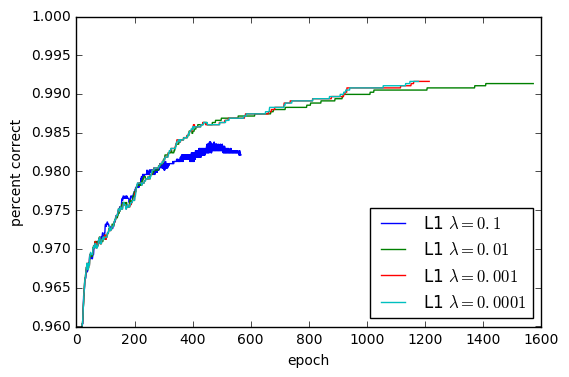

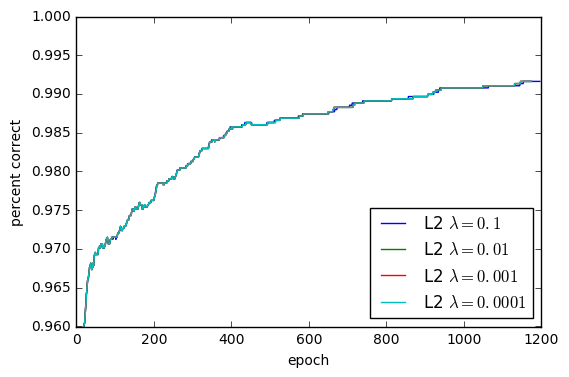

In [3]:
for L in ['L1', 'L2']:
    plt.figure()
    for lam in lams:
        plt.plot(r[(L, lam)].records['c_train'],
                 label='{} $\lambda = {}$'.format(L, lam))
    plt.legend(loc=0)    
    plt.xlabel('epoch')
    plt.ylabel('percent correct')
    plt.ylim(0.96, 1)
    plt.savefig('figs/{}_percent_correct.pdf'.format(L))

## Weight Vector Length

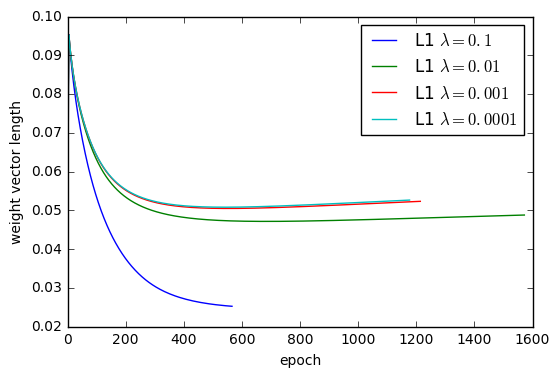

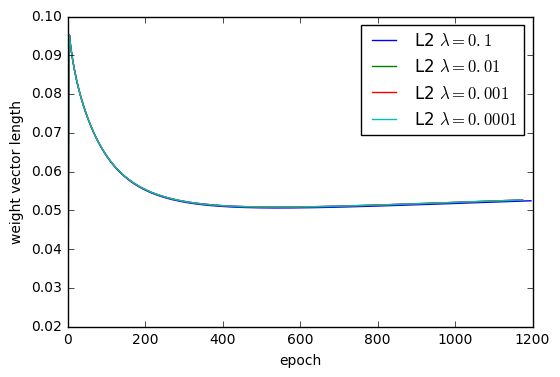

In [4]:
for L in ['L1', 'L2']:
    plt.figure()
    for lam in lams:
        weights = r[(L, lam)].records['weights']
        length = [np.linalg.norm(weight) for weight in weights]
        plt.plot(length,
                 label='{} $\lambda = {}$'.format(L, lam))
    plt.legend(loc=0)    
    plt.xlabel('epoch')
    plt.ylabel('weight vector length')
    plt.savefig('figs/{}_weight_vector_length.pdf'.format(L))

## Final Test Set Error

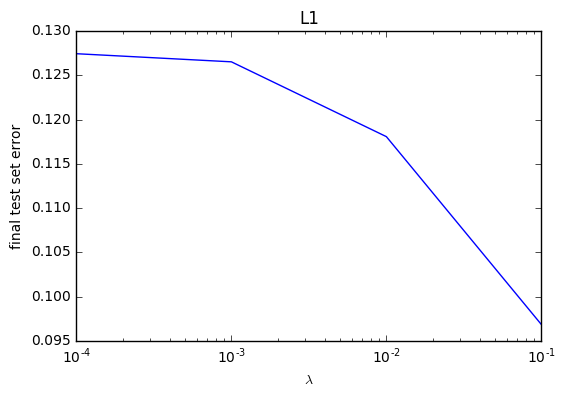

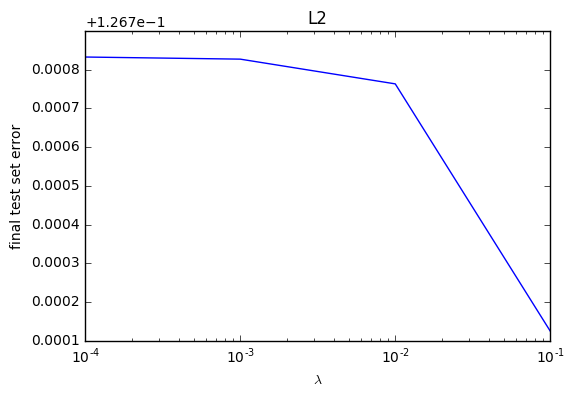

In [5]:
for L in ['L1', 'L2']:
    plt.figure()
    final_test_set_error = []
    for lam in lams:
        test_set_error = r[(L, lam)].records['E_test']
        final_test_set_error += [
            test_set_error[r[(L, lam)].epoch_final]
        ]
    plt.semilogx(lams, final_test_set_error)
    plt.xlabel('$\lambda$')
    plt.ylabel('final test set error')
    plt.title(L)
    plt.savefig('figs/{}_final_test_error.pdf'.format(L))

## Weights Images

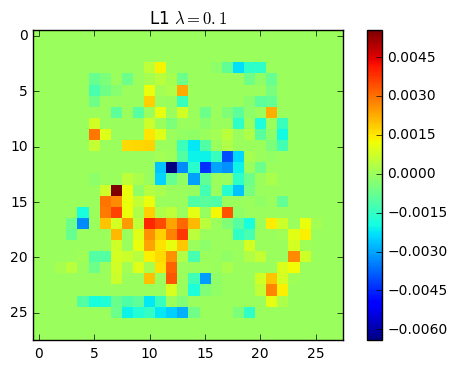

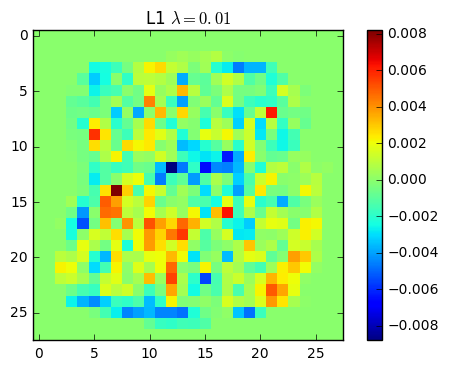

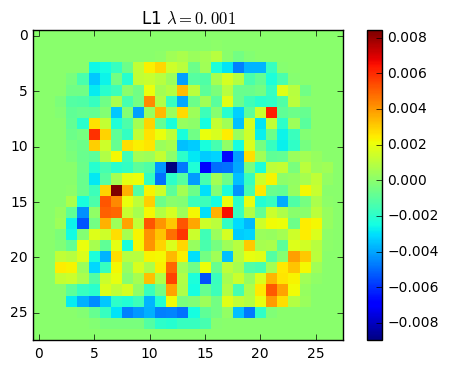

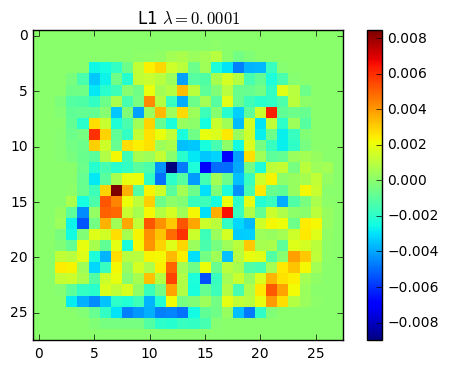

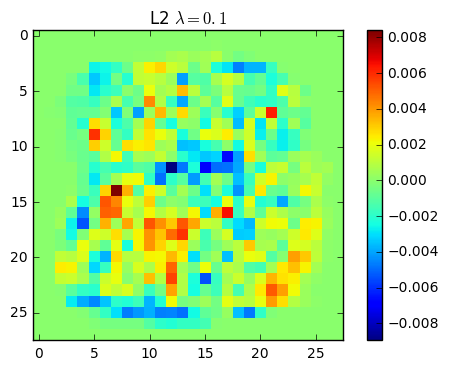

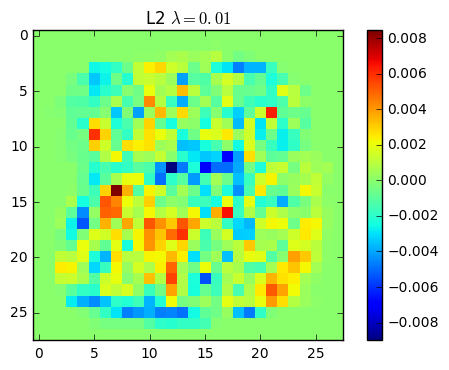

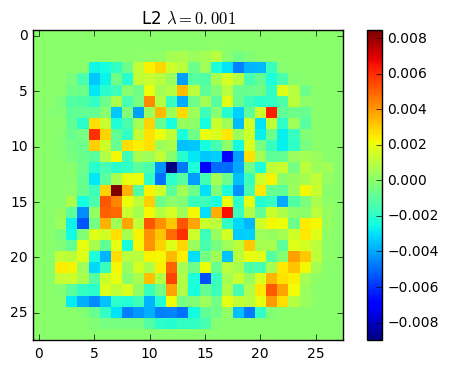

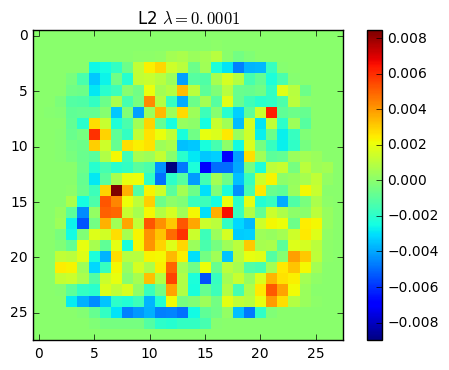

In [8]:
def plot_weights(w):
    w = w[1:]
    side = int(len(w) ** 0.5)
    w = w.reshape((side, side))
    plt.imshow(w, interpolation='nearest')
    plt.colorbar()

for L in ['L1', 'L2']:
    for lam in lams:
        plt.figure()
        plot_weights(r[L, lam].final_weights)
        plt.title('{} $\lambda = {}$'.format(L, lam))
        plt.savefig('figs/{}_{}.pdf'.format(L, lam))